In [5]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

def bootstrap(x, resamples=10000):
    bootstrap_samples = []
    for i in range(resamples):
        bootstrap_sample = np.random.choice(x, size=len(x), replace=True)
        bootstrap_samples.append(np.array(bootstrap_sample))
    return np.array(bootstrap_samples)
x = np.array([1,5,8,10,15,20,4,7])
print(bootstrap(x).shape)


(10000, 8)


In [6]:
df = pd.read_csv('data/productivity.txt')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 1 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   -1.910000000000000142e+01  24 non-null     float64
dtypes: float64(1)
memory usage: 320.0 bytes
None


Only reporting the mean difference is inappropriate because it may not be a true representation of the population <br />
If there are some extreme outliers, then maybe the median or mode might be more representative.  The certainty of the mean needs <br />
to be measured as a confidence interval. 

In [18]:
txt = np.loadtxt('data/productivity.txt')


def bootstrap_ci(sample, stat_function=np.mean, resamples=10000, ci=95):
    bootstrap_samples = bootstrap(sample, resamples)
    sample = list(map(stat_function, bootstrap_samples))
    sample = np.array(sample)
    left_endpoint = np.percentile(sample, (100-ci)/2)
    right_endpoint = np.percentile(sample, ci+(100-ci)/2)
    return left_endpoint, right_endpoint, sample

left, right, sample = bootstrap_ci(txt)
print(sample.shape, left, right)

(10000,) -0.2321 10.312099999999997


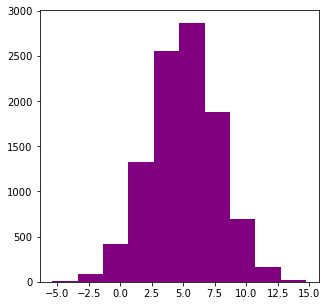

In [19]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.hist(sample, color='purple')
plt.show()

Based on the 95% confidence interval, there is a potential for a drop in production since the lower bound includes zero and therefore productivity may not increase by <br /> obaining new monitors



In [21]:
left, right, sample = bootstrap_ci(txt, ci=90)
print(sample.shape, left, right)

(10000,) 0.6199999999999994 9.52


Based on a 90% confidence interval, the lower bound is 0.67 and therefore their should be an increase in productivity.<br />

If the screens cost $500 and each unit of productivity equates to a $2000 increase then the overall increase in net profit would be <br />
$2000*(100)*0.67 - $500*100 = $84000

In [22]:
lsat_data_raw = np.loadtxt('data/law_sample.txt')
lsat = lsat_data_raw[:, 0]
gpa = lsat_data_raw[:, 1]
corr = stats.pearsonr(lsat, gpa)
print(corr)
def bootstrap_ci(x1,x2, stat_function=stats.pearsonr, resamples=10000, ci=95):
    x1_samples = bootstrap(x1, resamples)
    x2_samples = bootstrap(x2, resamples)
    sample = []
    for i in range(len(x1_samples)):
        sample.append(stat_function(x1_samples[i], x2_samples[i]))
    sample = np.array(sample)
    left_endpoint = np.percentile(sample[:, 0], (100-ci)/2)
    right_endpoint = np.percentile(sample[:, 0], ci+(100-ci)/2)
    return left_endpoint, right_endpoint, sample

left, right, sample = bootstrap_ci(lsat, gpa)
print(left, right)

(0.776374491289407, 0.0006651020111028156)
-0.5147643227225959 0.5096001577322362


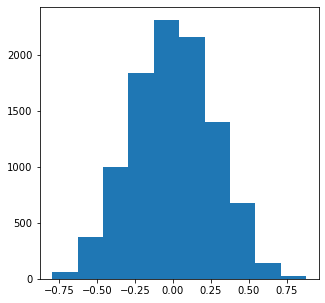

In [23]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.hist(sample[:,0])
plt.show()
